# Lasso

In [6]:
import os, sys, pathlib

UTILS_FOLDER = "S00 - Utils"
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import plot_reg, plot_res, store_results
from sklearn.linear_model import Lasso


In [8]:
# Load data
df = pd.read_excel(
    f"{utilPath}/housing_data.xlsx",
)

# Extract data
X = df[["LSTAT"]].values
y = df["MEDV"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [9]:
paramSet = {
    "ex1": {
        "alpha": 1,
    },
    "ex2": {
        "alpha": 10,
    },
    "ex3": {
        "alpha": 20,
    },
    "ex4": {
        "alpha": 30,
    },
}

,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test
0,Lasso-ex1,-0.948126,34.540785,37.953993,39.715971,0.552242,0.523020
1,Lasso-ex2,-0.767994,32.299829,39.935443,40.723773,0.528866,0.510917
2,Lasso-ex3,-0.567848,29.809877,45.939836,45.893546,0.458030,0.448829
3,Lasso-ex4,-0.367701,27.319925,55.947159,55.326469,0.339970,0.335542


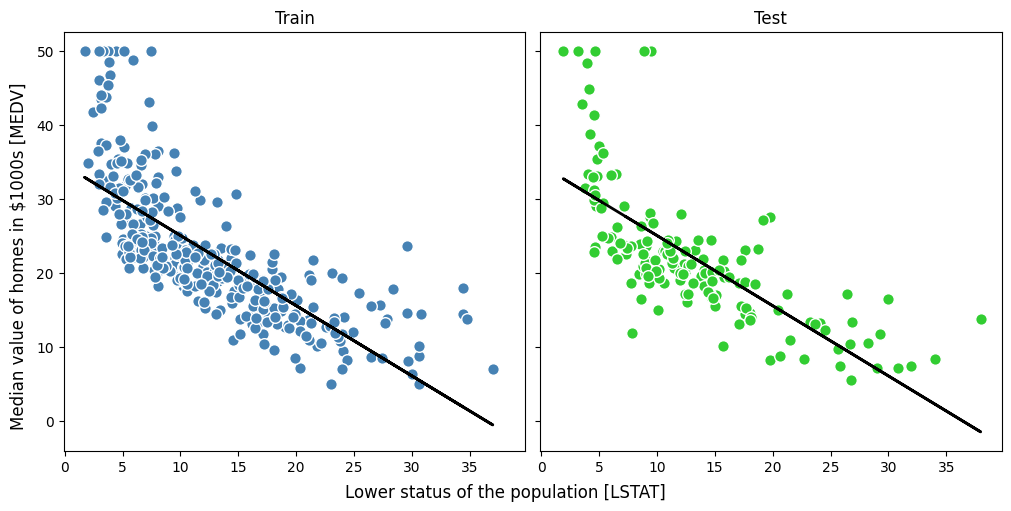

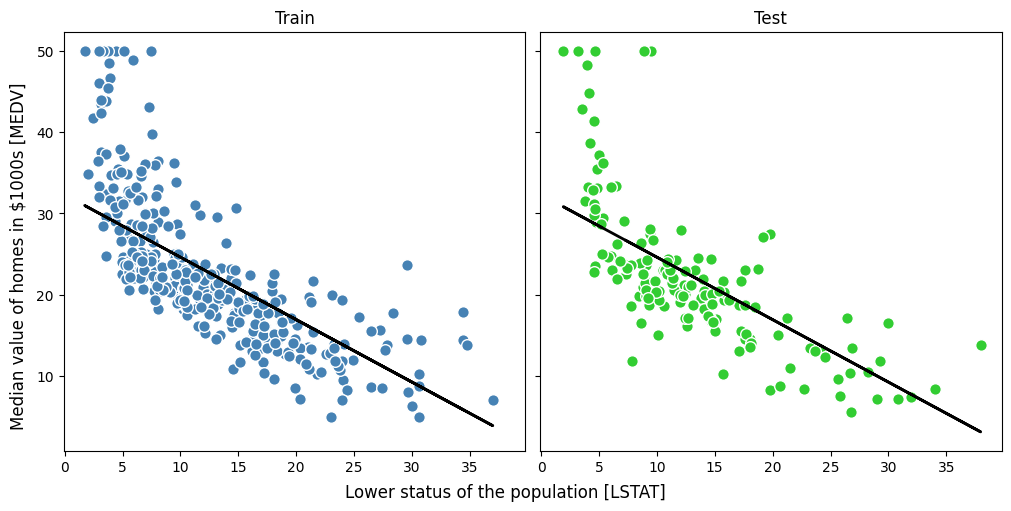

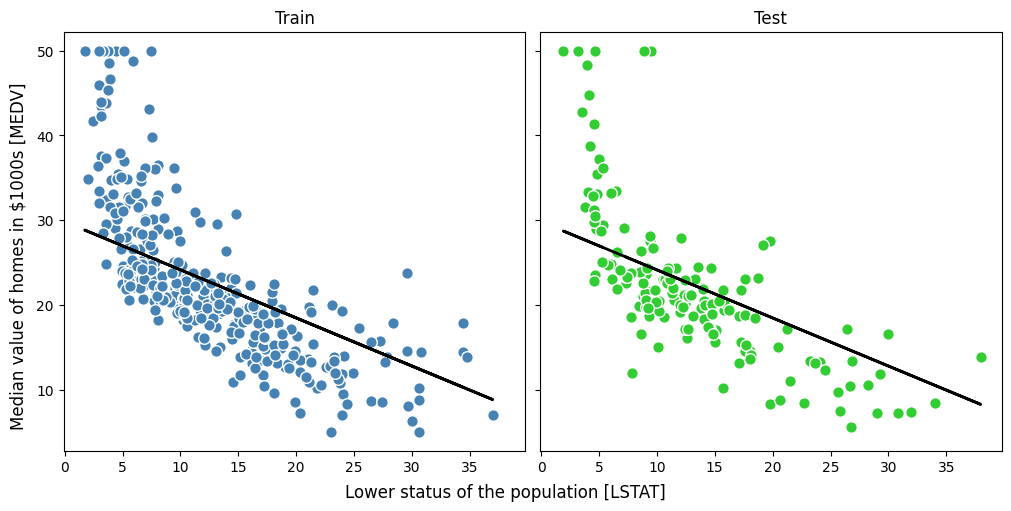

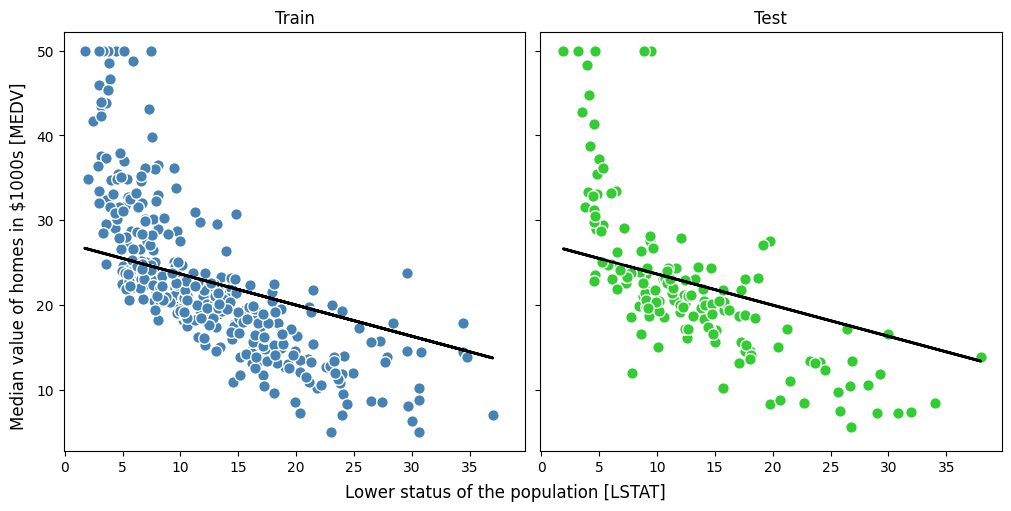

In [10]:
results = []

for name, values in paramSet.items():
    model  = Lasso(**values)
  
    # Fitting model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    store_results(
        results=results,
        model_name=f"Lasso-{name}",
        model=model,
        y_train=y_train,
        y_test=y_test,
        y_train_pred=y_train_pred,
        y_test_pred=y_test_pred,

    )

    # Plotting
    plot_reg(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)
    # plot_res(y_train, y_test, y_train_pred, y_test_pred)

df = pd.DataFrame.from_records(results)
display(df)
